In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Market_data_set.csv")
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,Product_SK,PRODUCTCODE,Customer_SK,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,95,1,S10_1678,1,USA,Small
1,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,95,2,S10_1678,2,France,Small
2,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,95,3,S10_1678,3,France,Medium
3,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,95,4,S10_1678,4,USA,Medium
4,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,95,5,S10_1678,5,USA,Medium


In [3]:
df.isna().sum() # There are no missing values

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
Product_SK         0
PRODUCTCODE        0
Customer_SK        0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_encoded = pd.DataFrame()
columns_to_encode = ['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'COUNTRY', 'DEALSIZE']
for column in columns_to_encode:
    df_encoded[column] = label_encoder.fit_transform(df[column])

df_encoded.head()

,STATUS,PRODUCTLINE,PRODUCTCODE,COUNTRY,DEALSIZE
0,5,1,0,18,2
1,5,1,0,6,2
2,5,1,0,6,1
3,5,1,0,18,1
4,5,1,0,18,1


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_columns = df.select_dtypes(include=['number'])
df_encoded[numeric_columns.columns] = scaler.fit_transform(df[numeric_columns.columns])
df_encoded


,STATUS,PRODUCTLINE,PRODUCTCODE,COUNTRY,DEALSIZE,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,Product_SK,Customer_SK
0,5,1,0,18,2,-0.522891,0.596978,-1.057059,-0.370825,-1.427039,-1.392909,-1.165170,-0.142246,-1.731437,-1.731437
1,5,1,0,6,2,-0.112201,-0.114450,-0.347015,-0.427897,-0.596243,-0.572337,-1.165170,-0.142246,-1.730210,-1.730210
2,5,1,0,6,1,0.606505,0.549384,-1.057059,0.179443,0.234553,-0.025289,-1.165170,-0.142246,-1.728983,-1.728983
3,5,1,0,18,1,1.017195,-0.019759,-0.110334,0.104701,0.234553,0.248235,-1.165170,-0.142246,-1.727756,-1.727756
4,5,1,0,18,1,1.427884,0.810158,1.783116,0.896740,1.065350,0.795284,-1.165170,-0.142246,-1.726529,-1.726529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,5,3,108,14,2,-1.549615,0.810158,2.019797,-0.711084,1.065350,1.342332,0.264328,-1.162634,1.726529,1.726529
2819,5,3,108,5,1,-0.625563,0.810158,-1.293740,0.230579,-1.427039,-1.666433,1.693826,-1.162634,1.727756,1.727756
2820,4,3,108,14,1,0.811850,0.810158,-0.583696,1.012024,-1.427039,-1.119385,1.693826,-1.162634,1.728983,1.728983
2821,5,3,108,6,2,-0.112201,-1.061864,-1.293740,-0.780722,-1.427039,-1.119385,1.693826,-1.162634,1.730210,1.730210


In [6]:
X = df_encoded.drop('DEALSIZE', axis=1).values
Y = df_encoded['DEALSIZE'].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
y_test[0]

2

In [9]:
from tensorflow import keras

In [10]:
model = keras.Sequential([
    keras.layers.Dense(16, input_shape=(14,), activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation = 'sigmoid')
])

In [11]:

# Compilation of model
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [12]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
# If there is no improvement in the last 5 epochs, stop the training process to prevent overfitting

In [13]:

# fitting the model
history = model.fit(X_train, y_train,
          epochs=30, validation_data=(X_test, y_test), batch_size=32,callbacks=[es])

Epoch 1/30
71/71 [==============================] - 1s 4ms/step - loss: 0.9671 - accuracy: 0.5199 - val_loss: 0.8305 - val_accuracy: 0.5894
Epoch 2/30
71/71 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.6895 - val_loss: 0.5635 - val_accuracy: 0.8142
Epoch 3/30
71/71 [==============================] - 0s 2ms/step - loss: 0.4535 - accuracy: 0.8450 - val_loss: 0.3863 - val_accuracy: 0.8726
Epoch 4/30
71/71 [==============================] - 0s 1ms/step - loss: 0.3404 - accuracy: 0.8791 - val_loss: 0.3205 - val_accuracy: 0.8867
Epoch 5/30
71/71 [==============================] - 0s 2ms/step - loss: 0.2919 - accuracy: 0.8862 - val_loss: 0.2635 - val_accuracy: 0.9062
Epoch 6/30
71/71 [==============================] - 0s 1ms/step - loss: 0.2454 - accuracy: 0.9079 - val_loss: 0.2405 - val_accuracy: 0.9097
Epoch 7/30
71/71 [==============================] - 0s 1ms/step - loss: 0.2227 - accuracy: 0.9163 - val_loss: 0.2082 - val_accuracy: 0.9257
Epoch 8/30
71/71 [==

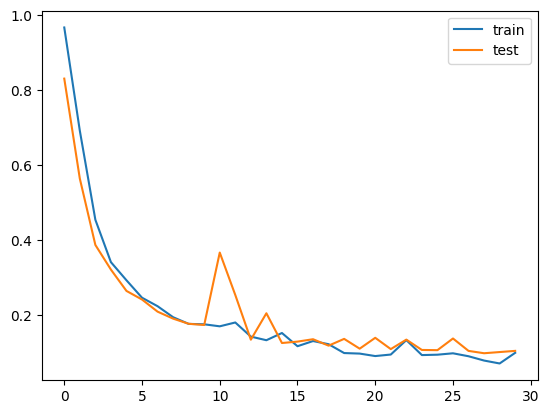

In [14]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [15]:
from sklearn.metrics import accuracy_score
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.2f}')

loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss: {loss[0]:.2f}')


18/18 [==============================] - 0s 567us/step
Accuracy: 0.95
Loss: 0.10


In [16]:
from sklearn.metrics import classification_report

classification_report_str = classification_report(y_test, y_pred_classes)

# Print the classification report
print('Classification Report:\n', classification_report_str)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        41
           1       0.97      0.93      0.95       272
           2       0.94      0.98      0.96       252

    accuracy                           0.95       565
   macro avg       0.93      0.95      0.94       565
weighted avg       0.95      0.95      0.95       565

